In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

# Import data and get into column format

In [2]:
df = pd.read_csv('./data/original/ESP_PUBLIC.IDENTITE_ARBRE.csv')# , dtype={'GeoJSON', 'dict'})

In [3]:
df.head()

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,COURRIER,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON
0,43866,ESP40237,ESP40237,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP453,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7209090239891..."
1,38181,ESP38129,ESP38129,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7048112482231..."
2,38182,ESP38130,ESP38130,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.704875754357,..."
3,38183,ESP38131,ESP38131,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7049488370901..."
4,38184,ESP38132,ESP38132,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7050118332264..."


In [4]:
# on regarde comment traiter les données géographiques présentent dans la colonne GeoJSON en jouant avec les dictionnaires

In [5]:
df.GeoJSON #[0]

0        {"type":"Point","coordinates":[5.7209090239891...
1        {"type":"Point","coordinates":[5.7048112482231...
2        {"type":"Point","coordinates":[5.704875754357,...
3        {"type":"Point","coordinates":[5.7049488370901...
4        {"type":"Point","coordinates":[5.7050118332264...
                               ...                        
31613    {"type":"Point","coordinates":[5.7450046835939...
31614    {"type":"Point","coordinates":[5.7489636563559...
31615    {"type":"Point","coordinates":[5.7435139923380...
31616    {"type":"Point","coordinates":[5.7432936656735...
31617    {"type":"Point","coordinates":[5.7338548141920...
Name: GeoJSON, Length: 31618, dtype: object

In [6]:
df.GeoJSON[0]

'{"type":"Point","coordinates":[5.72090902398911,45.1623384592357]}'

In [7]:
type(df.GeoJSON[0])

str

https://appdividend.com/2020/11/20/how-to-convert-python-string-to-dictionary/

https://www.geeksforgeeks.org/json-loads-in-python/

In [8]:
import json
# x = json.loads('{"foo" : "bar", "hello" : "world"}')
# Json.load convert JSON into a dictionnary

In [9]:
df['GeoJSON'] = df.GeoJSON.apply(lambda x : json.loads(x))

In [10]:
df['GeoJSON'][0]

{'type': 'Point', 'coordinates': [5.72090902398911, 45.1623384592357]}

In [11]:
df['GeoJSON'][0]['coordinates']

[5.72090902398911, 45.1623384592357]

In [12]:
df['LONGITUDE'] = df['GeoJSON'].apply(lambda x : x['coordinates'][0])
df['LONGITUDE']

0        5.720909
1        5.704811
2        5.704876
3        5.704949
4        5.705012
           ...   
31613    5.745005
31614    5.748964
31615    5.743514
31616    5.743294
31617    5.733855
Name: LONGITUDE, Length: 31618, dtype: float64

In [13]:
df['LATITUDE'] = df['GeoJSON'].apply(lambda x : x['coordinates'][1])
df['LATITUDE']

0        45.162338
1        45.177938
2        45.177932
3        45.177936
4        45.177932
           ...    
31613    45.175206
31614    45.177531
31615    45.171506
31616    45.173542
31617    45.170811
Name: LATITUDE, Length: 31618, dtype: float64

In [14]:
df = df.drop(axis=1, labels='GeoJSON')

# investigate data 

In [15]:
df.head()

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,LONGITUDE,LATITUDE
0,43866,ESP40237,ESP40237,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP453,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.720909,45.162338
1,38181,ESP38129,ESP38129,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.704811,45.177938
2,38182,ESP38130,ESP38130,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.704876,45.177932
3,38183,ESP38131,ESP38131,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.704949,45.177936
4,38184,ESP38132,ESP38132,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.705012,45.177932


In [16]:
df.shape

(31618, 33)

In [17]:
#### check to see how many missing values
df.isnull().sum()

ELEM_POINT_ID                0
CODE                         0
NOM                          0
GENRE                        0
GENRE_DESC                   0
CATEGORIE                    0
CATEGORIE_DESC               0
SOUS_CATEGORIE               0
SOUS_CATEGORIE_DESC          0
CODE_PARENT                  0
CODE_PARENT_DESC             0
ADR_SECTEUR                  0
BIEN_REFERENCE               0
GENRE_BOTA                 933
ESPECE                    2534
VARIETE                  27138
STADEDEDEVELOPPEMENT      2950
EQUIPE                   31618
REMARQUES                26262
ANNEEDEPLANTATION         1438
RAISONDEPLANTATION       28706
TRAITEMENTCHENILLES      29467
COURRIER                 31618
IDENTIFIANTPLU           31017
TYPEIMPLANTATIONPLU      31017
INTITULEPROTECTIONPLU    31017
ANNEEABATTAGE            31618
ESSOUCHEMENT             31618
DIAMETREARBRE            31618
CAUSEABATTAGE            31618
COLLECTIVITE               431
LONGITUDE                    0
LATITUDE

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31618 entries, 0 to 31617
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ELEM_POINT_ID          31618 non-null  int64  
 1   CODE                   31618 non-null  object 
 2   NOM                    31618 non-null  object 
 3   GENRE                  31618 non-null  object 
 4   GENRE_DESC             31618 non-null  object 
 5   CATEGORIE              31618 non-null  object 
 6   CATEGORIE_DESC         31618 non-null  object 
 7   SOUS_CATEGORIE         31618 non-null  object 
 8   SOUS_CATEGORIE_DESC    31618 non-null  object 
 9   CODE_PARENT            31618 non-null  object 
 10  CODE_PARENT_DESC       31618 non-null  object 
 11  ADR_SECTEUR            31618 non-null  int64  
 12  BIEN_REFERENCE         31618 non-null  object 
 13  GENRE_BOTA             30685 non-null  object 
 14  ESPECE                 29084 non-null  object 
 15  VA

In [19]:
df.dtypes

ELEM_POINT_ID              int64
CODE                      object
NOM                       object
GENRE                     object
GENRE_DESC                object
CATEGORIE                 object
CATEGORIE_DESC            object
SOUS_CATEGORIE            object
SOUS_CATEGORIE_DESC       object
CODE_PARENT               object
CODE_PARENT_DESC          object
ADR_SECTEUR                int64
BIEN_REFERENCE            object
GENRE_BOTA                object
ESPECE                    object
VARIETE                   object
STADEDEDEVELOPPEMENT      object
EQUIPE                   float64
REMARQUES                 object
ANNEEDEPLANTATION        float64
RAISONDEPLANTATION        object
TRAITEMENTCHENILLES       object
COURRIER                 float64
IDENTIFIANTPLU           float64
TYPEIMPLANTATIONPLU       object
INTITULEPROTECTIONPLU     object
ANNEEABATTAGE            float64
ESSOUCHEMENT             float64
DIAMETREARBRE            float64
CAUSEABATTAGE            float64
COLLECTIVI

In [20]:
df.describe()

,ELEM_POINT_ID,ADR_SECTEUR,EQUIPE,ANNEEDEPLANTATION,COURRIER,IDENTIFIANTPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,LONGITUDE,LATITUDE
count,31618.00000,31618.000000,0.0,30180.000000,0.0,601.000000,0.0,0.0,0.0,0.0,31618.000000,31618.000000
mean,19647.20716,3.840819,NaN,1989.384427,NaN,87.826955,NaN,NaN,NaN,NaN,5.727567,45.177209
std,12134.29949,1.713904,NaN,17.372641,NaN,60.611743,NaN,NaN,NaN,NaN,0.013106,0.012171
min,1.00000,1.000000,NaN,1900.000000,NaN,2.000000,NaN,NaN,NaN,NaN,5.695056,45.151572
25%,9417.25000,2.000000,NaN,1975.000000,NaN,67.000000,NaN,NaN,NaN,NaN,5.717559,45.166124
50%,18921.50000,4.000000,NaN,1985.000000,NaN,70.000000,NaN,NaN,NaN,NaN,5.729705,45.175822
75%,28430.75000,5.000000,NaN,2004.000000,NaN,70.000000,NaN,NaN,NaN,NaN,5.737575,45.187410
max,45450.00000,6.000000,NaN,2021.000000,NaN,358.000000,NaN,NaN,NaN,NaN,5.798704,45.224825


Check for unique values in columns

In [21]:
for label, column in df.items():
    print('-'*40)
    print(f'column name: {label}')
    print(f'number unique values: {column.nunique()}')
    print(f'unique values: {column.unique()}')


----------------------------------------
column name: ELEM_POINT_ID
number unique values: 31618
unique values: [43866 38181 38182 ...  1585  1588  1594]
----------------------------------------
column name: CODE
number unique values: 31618
unique values: ['ESP40237' 'ESP38129' 'ESP38130' ... 'ESP27820' 'ESP27821' 'ESP27822']
----------------------------------------
column name: NOM
number unique values: 31618
unique values: ['ESP40237' 'ESP38129' 'ESP38130' ... 'ESP27820' 'ESP27821' 'ESP27822']
----------------------------------------
column name: GENRE
number unique values: 1
unique values: ['VEG']
----------------------------------------
column name: GENRE_DESC
number unique values: 1
unique values: ['VEGETATION']
----------------------------------------
column name: CATEGORIE
number unique values: 1
unique values: ['ESP01']
----------------------------------------
column name: CATEGORIE_DESC
number unique values: 1
unique values: ['Arbre']
----------------------------------------
co

# remove useless columns

In [22]:
df.shape

(31618, 33)

#### Remove columns with all missing values

In [23]:
df.isnull().sum() == 31814

ELEM_POINT_ID            False
CODE                     False
NOM                      False
GENRE                    False
GENRE_DESC               False
CATEGORIE                False
CATEGORIE_DESC           False
SOUS_CATEGORIE           False
SOUS_CATEGORIE_DESC      False
CODE_PARENT              False
CODE_PARENT_DESC         False
ADR_SECTEUR              False
BIEN_REFERENCE           False
GENRE_BOTA               False
ESPECE                   False
VARIETE                  False
STADEDEDEVELOPPEMENT     False
EQUIPE                   False
REMARQUES                False
ANNEEDEPLANTATION        False
RAISONDEPLANTATION       False
TRAITEMENTCHENILLES      False
COURRIER                 False
IDENTIFIANTPLU           False
TYPEIMPLANTATIONPLU      False
INTITULEPROTECTIONPLU    False
ANNEEABATTAGE            False
ESSOUCHEMENT             False
DIAMETREARBRE            False
CAUSEABATTAGE            False
COLLECTIVITE             False
LONGITUDE                False
LATITUDE

In [24]:
empty_column_list = df.columns[df.isnull().sum() == 31814]
empty_column_list

Index([], dtype='object')

In [25]:
df.drop(axis=1, labels = empty_column_list)

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,LONGITUDE,LATITUDE
0,43866,ESP40237,ESP40237,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP453,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.720909,45.162338
1,38181,ESP38129,ESP38129,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.704811,45.177938
2,38182,ESP38130,ESP38130,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.704876,45.177932
3,38183,ESP38131,ESP38131,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.704949,45.177936
4,38184,ESP38132,ESP38132,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.705012,45.177932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31613,1576,ESP27818,ESP27818,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.745005,45.175206
31614,1579,ESP27819,ESP27819,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.748964,45.177531
31615,1585,ESP27820,ESP27820,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP148,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.743514,45.171506
31616,1588,ESP27821,ESP27821,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.743294,45.173542


Equally pandas has a method to do this...

In [26]:
df = df.dropna(axis=1,how='all')

In [27]:
df

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,REMARQUES,ANNEEDEPLANTATION,RAISONDEPLANTATION,TRAITEMENTCHENILLES,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,COLLECTIVITE,LONGITUDE,LATITUDE
0,43866,ESP40237,ESP40237,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP453,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.720909,45.162338
1,38181,ESP38129,ESP38129,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.704811,45.177938
2,38182,ESP38130,ESP38130,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.704876,45.177932
3,38183,ESP38131,ESP38131,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.704949,45.177936
4,38184,ESP38132,ESP38132,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.705012,45.177932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31613,1576,ESP27818,ESP27818,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1345,...,NaN,2011.0,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.745005,45.175206
31614,1579,ESP27819,ESP27819,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP625,...,NaN,1992.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.748964,45.177531
31615,1585,ESP27820,ESP27820,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP148,...,NaN,1976.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.743514,45.171506
31616,1588,ESP27821,ESP27821,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP389,...,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.743294,45.173542


##### drop all columns with only one value..

In [28]:
df.nunique()

ELEM_POINT_ID            31618
CODE                     31618
NOM                      31618
GENRE                        1
GENRE_DESC                   1
CATEGORIE                    1
CATEGORIE_DESC               1
SOUS_CATEGORIE               4
SOUS_CATEGORIE_DESC          4
CODE_PARENT               1465
CODE_PARENT_DESC          1465
ADR_SECTEUR                  6
BIEN_REFERENCE           31618
GENRE_BOTA                 119
ESPECE                     280
VARIETE                    216
STADEDEDEVELOPPEMENT         3
REMARQUES                 3045
ANNEEDEPLANTATION           65
RAISONDEPLANTATION           3
TRAITEMENTCHENILLES          3
IDENTIFIANTPLU              45
TYPEIMPLANTATIONPLU          4
INTITULEPROTECTIONPLU        3
COLLECTIVITE                 2
LONGITUDE                31618
LATITUDE                 31618
dtype: int64

In [29]:
single_value_columns_list = df.columns[df.nunique() == 1]
df.drop(axis=1, labels = single_value_columns_list)

,ELEM_POINT_ID,CODE,NOM,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,CODE_PARENT_DESC,ADR_SECTEUR,BIEN_REFERENCE,GENRE_BOTA,...,REMARQUES,ANNEEDEPLANTATION,RAISONDEPLANTATION,TRAITEMENTCHENILLES,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,COLLECTIVITE,LONGITUDE,LATITUDE
0,43866,ESP40237,ESP40237,ESP151,Arbre de voirie,ESP453,R Andrieux PM Curie R François,6,AR40237,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.720909,45.162338
1,38181,ESP38129,ESP38129,ESP151,Arbre de voirie,ESP1075,Av Rh Danube Vallier E Claires,3,AR38129,Platanus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.704811,45.177938
2,38182,ESP38130,ESP38130,ESP151,Arbre de voirie,ESP1075,Av Rh Danube Vallier E Claires,3,AR38130,Platanus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.704876,45.177932
3,38183,ESP38131,ESP38131,ESP151,Arbre de voirie,ESP1075,Av Rh Danube Vallier E Claires,3,AR38131,Platanus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.704949,45.177936
4,38184,ESP38132,ESP38132,ESP151,Arbre de voirie,ESP1075,Av Rh Danube Vallier E Claires,3,AR38132,Platanus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.705012,45.177932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31613,1576,ESP27818,ESP27818,ESP174,Arbre d'espaces ouverts,ESP1345,R L Jouhaux dev lycée Argouges,5,AR27818,Fraxinus,...,NaN,2011.0,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.745005,45.175206
31614,1579,ESP27819,ESP27819,ESP174,Arbre d'espaces ouverts,ESP625,R M Riollet cité rouge,5,AR27819,Acer,...,NaN,1992.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.748964,45.177531
31615,1585,ESP27820,ESP27820,ESP151,Arbre de voirie,ESP148,R G Tonnelier Cocat Fernandat,5,AR27820,Platanus,...,NaN,1976.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.743514,45.171506
31616,1588,ESP27821,ESP27821,ESP151,Arbre de voirie,ESP389,R Manteyer des J O à Ravanat,5,AR27821,Fraxinus,...,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.743294,45.173542


In [30]:
df = df.drop(axis=1, labels = single_value_columns_list)

In [31]:
df.shape

(31618, 23)

#### Some columns look like reference for database so decided to remove...

In [32]:
df.BIEN_REFERENCE

0        AR40237
1        AR38129
2        AR38130
3        AR38131
4        AR38132
          ...   
31613    AR27818
31614    AR27819
31615    AR27820
31616    AR27821
31617    AR27822
Name: BIEN_REFERENCE, Length: 31618, dtype: object

In [33]:
col_to_remove = ['NOM', 'BIEN_REFERENCE']

df = df.drop(col_to_remove, axis=1)

#### Remove missing dates in target variable for the moment

In [34]:
df = df[df.ANNEEDEPLANTATION.notnull()]
df.head()

,ELEM_POINT_ID,CODE,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,CODE_PARENT_DESC,ADR_SECTEUR,GENRE_BOTA,ESPECE,VARIETE,...,REMARQUES,ANNEEDEPLANTATION,RAISONDEPLANTATION,TRAITEMENTCHENILLES,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,COLLECTIVITE,LONGITUDE,LATITUDE
12,511,ESP10052,ESP151,Arbre de voirie,ESP346,Bd Esplan Autoroute A 48,2,Pinus,nigra,Austriaca,...,NaN,1970.0,NaN,Basse,NaN,NaN,NaN,Ville de Grenoble,5.716918,45.194803
15,15544,ESP27658,ESP151,Arbre de voirie,ESP346,Bd Esplan Autoroute A 48,2,Pinus,nigra,Austriaca,...,NaN,1970.0,NaN,Basse,NaN,NaN,NaN,Ville de Grenoble,5.716655,45.195170
16,26584,ESP11957,ESP151,Arbre de voirie,ESP346,Bd Esplan Autoroute A 48,2,Populus,alba,NaN,...,Penché,1970.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.716624,45.195246
18,41529,ESP39437,ESP174,Arbre d'espaces ouverts,ESP425,Ch Gordes Ouest conservatoire,4,Diospyros,kaki,NaN,...,NaN,2018.0,Nouveau,NaN,NaN,NaN,NaN,Ville de Grenoble,5.734082,45.173315
22,42381,ESP39683,ESP151,Arbre de voirie,ESP1343,R Frederico Garcia Lorca park,5,NaN,NaN,NaN,...,NaN,2016.0,Nouveau,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.734265,45.171728


In [35]:
df.shape

(30180, 21)

## where are missing values?

https://github.com/ResidentMario/missingno

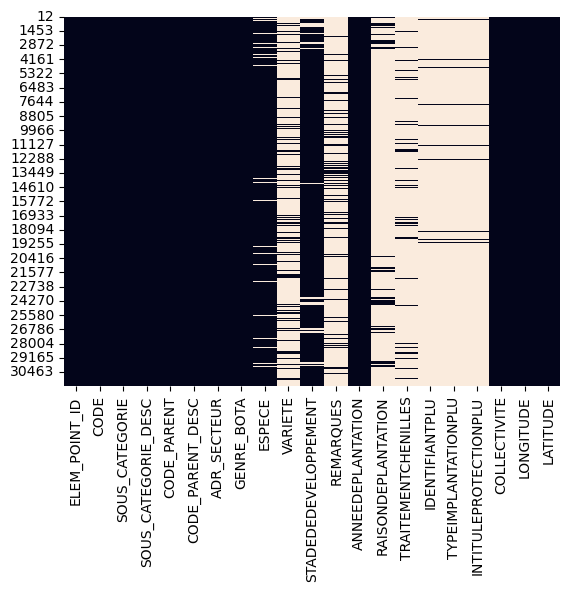

In [36]:
sns.heatmap(df.isnull(), cbar=False)
# les données manquantes sont en blanc

In [37]:
import missingno as msno

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

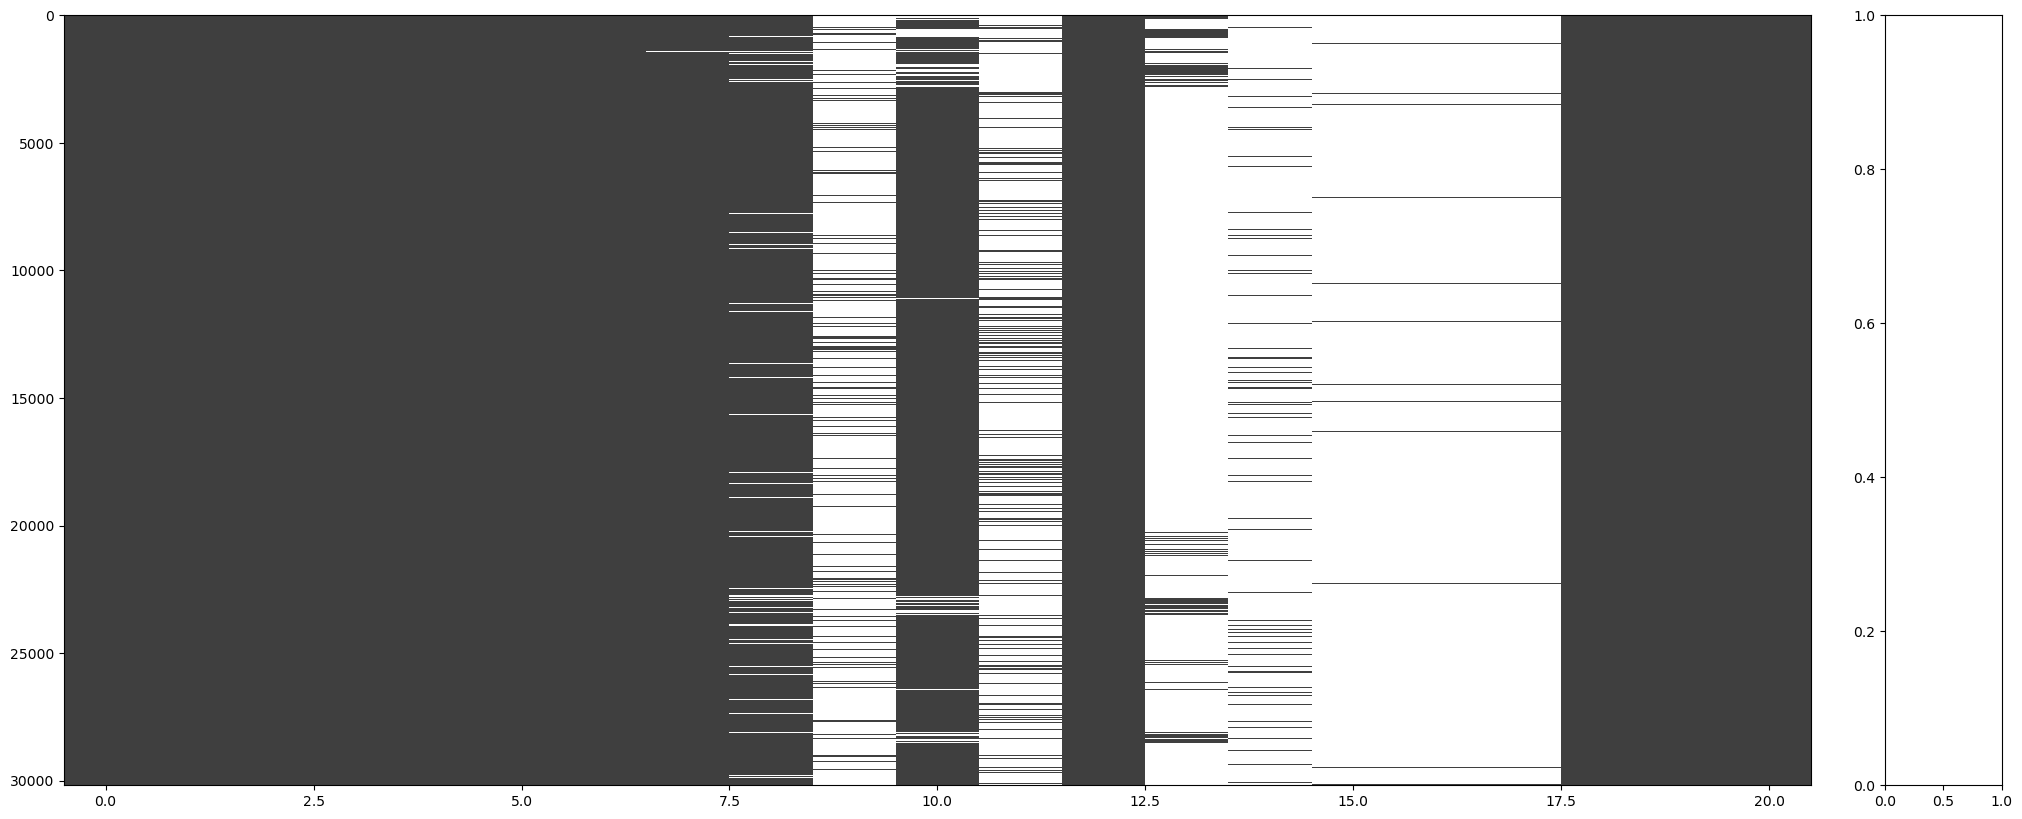

In [38]:
msno.matrix(df)

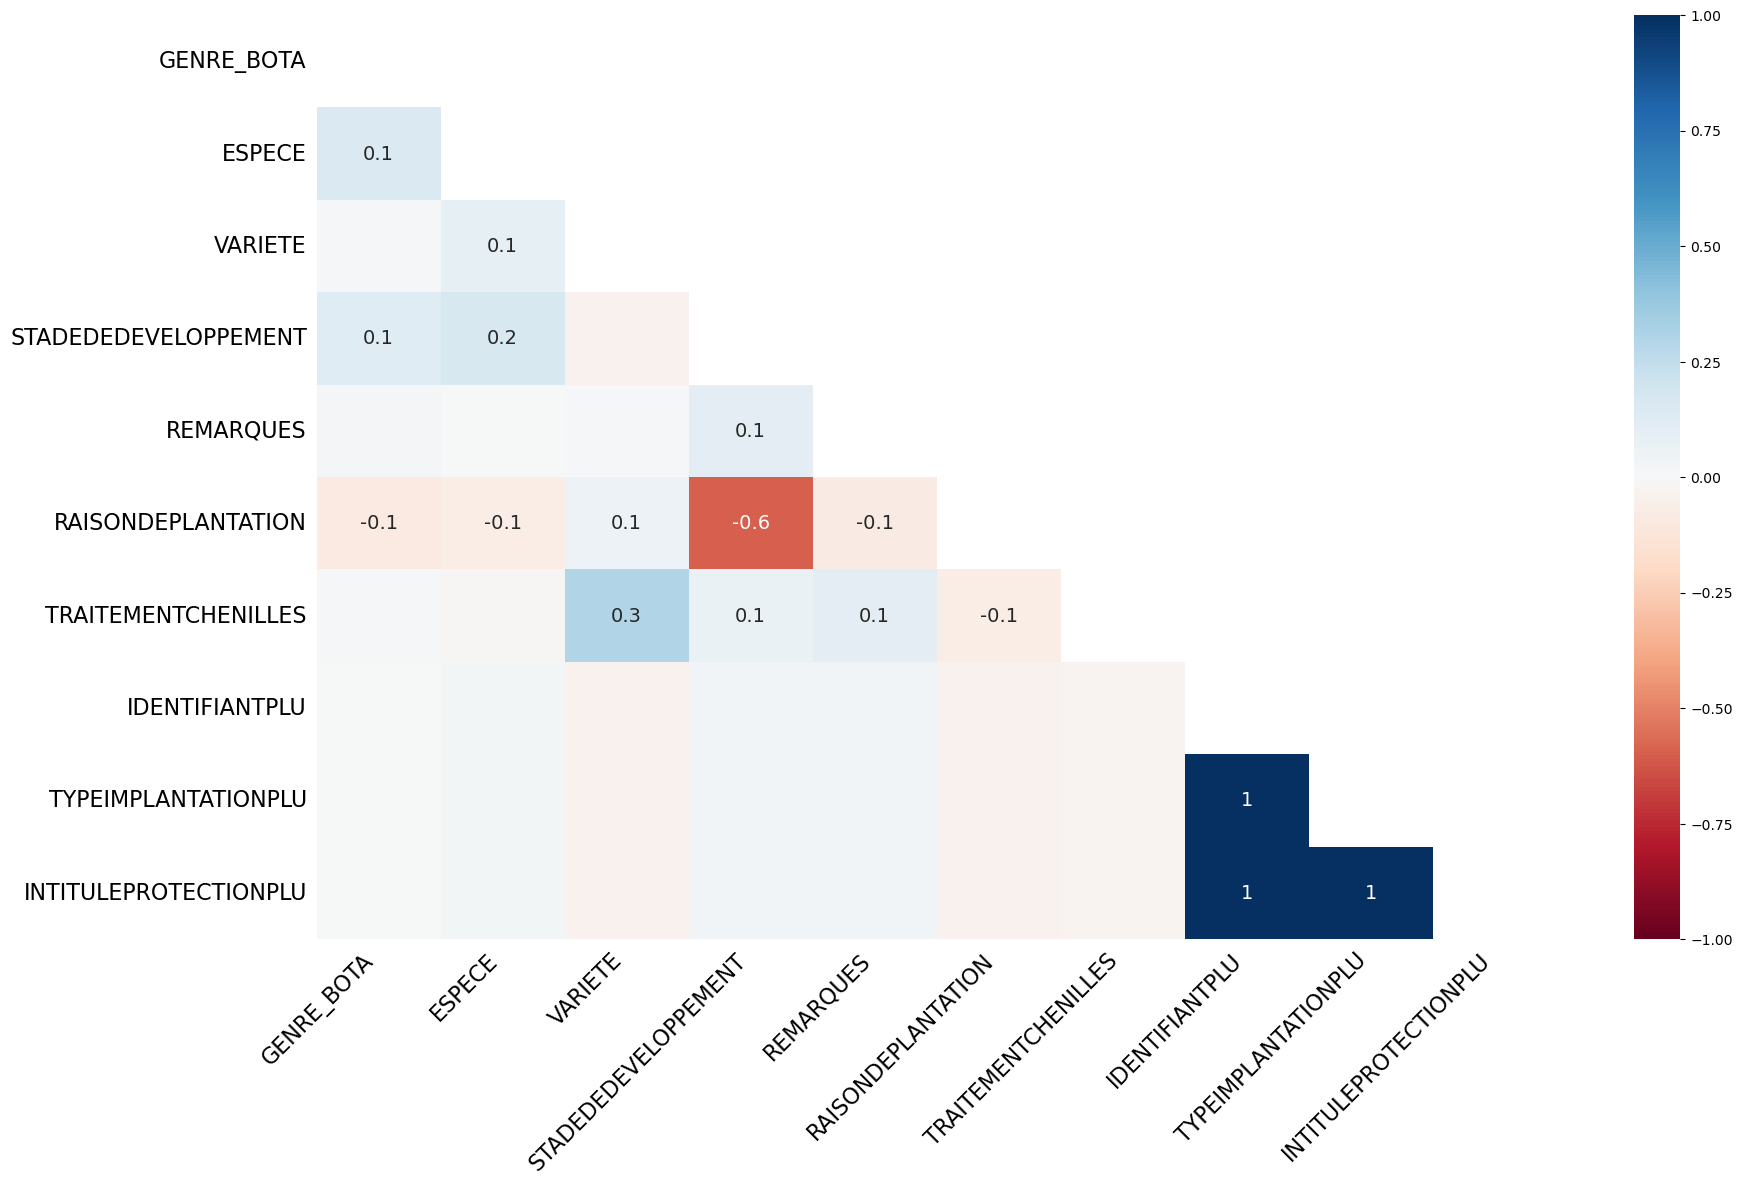

In [40]:
#### heatmap of null correlation! (not correlation of variables! we are not allowed to look at that yet)
msno.heatmap(df);

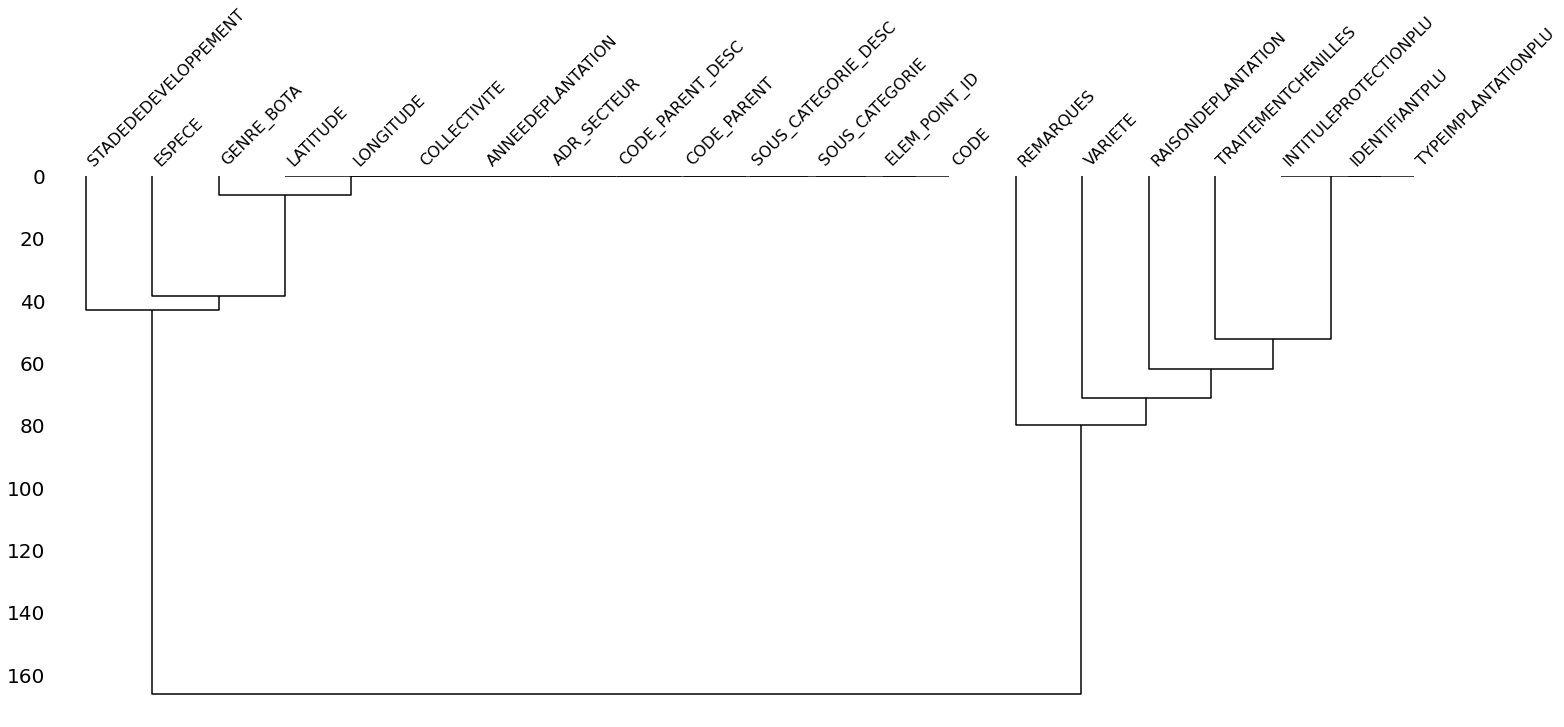

In [ ]:
msno.dendrogram(df);

##### remove empty columns (+ close to empty) 

*NOTE this step is questionable! We are making a decision here which could have a big impact on the final result of our model!* We might throw away something very important here that we will not see again!

In [41]:
cols_list_clean = df.columns[df.isnull().sum() < 28000]

In [42]:
cols_list_clean

Index(['ELEM_POINT_ID', 'CODE', 'SOUS_CATEGORIE', 'SOUS_CATEGORIE_DESC',
       'CODE_PARENT', 'CODE_PARENT_DESC', 'ADR_SECTEUR', 'GENRE_BOTA',
       'ESPECE', 'VARIETE', 'STADEDEDEVELOPPEMENT', 'REMARQUES',
       'ANNEEDEPLANTATION', 'RAISONDEPLANTATION', 'COLLECTIVITE', 'LONGITUDE',
       'LATITUDE'],
      dtype='object')

In [43]:
df = df[cols_list_clean]
df.head()

,ELEM_POINT_ID,CODE,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,CODE_PARENT_DESC,ADR_SECTEUR,GENRE_BOTA,ESPECE,VARIETE,STADEDEDEVELOPPEMENT,REMARQUES,ANNEEDEPLANTATION,RAISONDEPLANTATION,COLLECTIVITE,LONGITUDE,LATITUDE
12,511,ESP10052,ESP151,Arbre de voirie,ESP346,Bd Esplan Autoroute A 48,2,Pinus,nigra,Austriaca,Arbre adulte,NaN,1970.0,NaN,Ville de Grenoble,5.716918,45.194803
15,15544,ESP27658,ESP151,Arbre de voirie,ESP346,Bd Esplan Autoroute A 48,2,Pinus,nigra,Austriaca,Arbre adulte,NaN,1970.0,NaN,Ville de Grenoble,5.716655,45.195170
16,26584,ESP11957,ESP151,Arbre de voirie,ESP346,Bd Esplan Autoroute A 48,2,Populus,alba,NaN,Arbre adulte,Penché,1970.0,NaN,Ville de Grenoble,5.716624,45.195246
18,41529,ESP39437,ESP174,Arbre d'espaces ouverts,ESP425,Ch Gordes Ouest conservatoire,4,Diospyros,kaki,NaN,Arbre jeune,NaN,2018.0,Nouveau,Ville de Grenoble,5.734082,45.173315
22,42381,ESP39683,ESP151,Arbre de voirie,ESP1343,R Frederico Garcia Lorca park,5,NaN,NaN,NaN,NaN,NaN,2016.0,Nouveau,Grenoble Alpes Métropole,5.734265,45.171728


In [44]:
df.shape

(30180, 17)

NOTES

Features looking useful:
* sous_category looks useful (4 cats)
* ADR_SECTEUR (6 cats)
* STADEDEDEVELOPPEMENT (3 cats) 
* COLLECTIVITE (2 cats)


Less useful:
* CODE_PARENT_DESC (too many cats - ~1400, but could be usefull to make new featues (most common tree in local area etc).
* GENRE_BOTA (112 cats) 
* ESPECE(257 cats)
* VARIETE (183 cats but missing vals) 

df.to_csv('./data/modified/first_clean.csv',index=False)

## Save out to pickle file

In [ ]:
df.to_pickle('./data/modified/trees_first_clean.pkl')